In [1]:
import pandas as pd
import numpy as np
import json
import datetime
import time
from bs4 import BeautifulSoup
import re
import json

### Read JSON directly to Pandas


In [9]:
user_data = []
with open('C:\\Users\\Sanchayni\\Desktop\\Spring19\\DPA\\Project\\yelp_dataset\\user.json',encoding="utf8") as fin:
    for line in fin:
        line_contents = json.loads(line)
        user_data.append(line_contents)

In [12]:
user_data = pd.DataFrame(user_data)

In [13]:
user_data.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.03,1,0,1,2,0,0,1,0,1,...,25,"2015,2016,2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,Rashmi,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33
1,3.63,1,0,1,1,0,0,0,0,0,...,16,,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06
2,3.71,0,0,0,0,0,0,1,0,0,...,10,,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,David,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10
3,4.85,0,0,0,1,0,0,0,0,2,...,14,,5,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",4,Angela,17,30,dD0gZpBctWGdWo9WlGuhlA,2014-05-22 15:57:30
4,4.08,80,0,80,28,1,1,16,5,57,...,665,"2015,2016,2017,2018",39,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",279,Nancy,361,1114,MM4RJAeH6yuaN8oZDSt0RA,2013-10-23 07:02:50


In [24]:
print(user_data.columns)
print(user_data.shape)

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since'],
      dtype='object')
(1637138, 22)


In [21]:
business_data = []
with open('C:\\Users\\Sanchayni\\Desktop\\Spring19\\DPA\\Project\\yelp_dataset\\business.json',encoding="utf8") as fin:
    for line in fin:
        line_contents = json.loads(line)
        business_data.append(line_contents)

In [22]:
business_data = pd.DataFrame(business_data)

In [23]:
business_data.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [29]:
print(business_data.columns)
print(business_data.shape)

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state'],
      dtype='object')
(192609, 14)


In [30]:
review_data = []
with open('C:\\Users\\Sanchayni\\Desktop\\Spring19\\DPA\\Project\\yelp_dataset\\review.json',encoding="utf8") as fin:
    for line in fin:
        line_contents = json.loads(line)
        review_data.append(line_contents)

In [31]:
review_data = pd.DataFrame(review_data)

In [32]:
print(review_data.columns)
print(review_data.shape)

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id'],
      dtype='object')
(6685900, 9)


In [41]:
print(len(review_data['business_id'].unique()))
print(len(review_data['user_id'].unique()))

1637138

### Geocoding the business data

In [44]:
import geopandas as gp
import matplotlib.pyplot as plt

In [56]:
import seaborn as sns 
sns.set()

In [43]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

In [45]:
from shapely.geometry import Point

In [51]:
# Creating point coordinates from lat and long
business_data['location_coordinates'] = list(zip(business_data.longitude, business_data.latitude))
business_data['location_coordinates'] = business_data['location_coordinates'].apply(Point)

In [52]:
geo_business_data = gp.GeoDataFrame(business_data, geometry='location_coordinates')

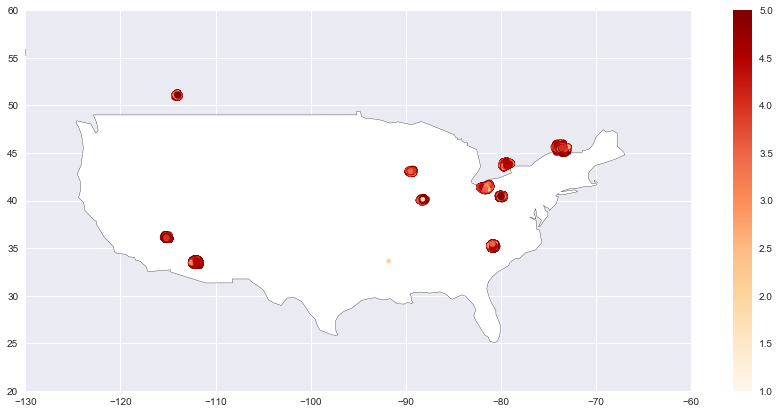

In [69]:
ax = world.loc[world['iso_a3'] == 'USA',:].plot(edgecolor='k', facecolor='white')
geo_business_data.plot(ax = ax,cmap='OrRd', column='stars',legend = True,markersize =business_data['stars']*10)
ax.set(xlim=(-130, -60), ylim=(20,60))
plt.gcf().set_size_inches(15,7)
plt.show()